In [3]:
import nltk
#nltk.download('wordnet')
from nltk.corpus import wordnet as wn

In [10]:
wn.synsets('lion')

[Synset('lion.n.01'),
 Synset('lion.n.02'),
 Synset('leo.n.01'),
 Synset('leo.n.03')]

In [6]:
text=' '.join(open('input.txt').readlines())

In [15]:
text='''We introduce a stochastic graph-based method for computing relative\nimportance of textual units for Natural Language Processing. We test the\ntechnique on the problem of Text Summarization (TS). Extractive TS relies on\nthe concept of sentence salience to identify the most important sentences in a\ndocument or set of documents. Salience is typically defined in terms of the\npresence of particular important words or in terms of similarity to a centroid\npseudo-sentence. We consider a new approach, LexRank, for computing sentence\nimportance based on the concept of eigenvector centrality in a graph\nrepresentation of sentences. In this model, a connectivity matrix based on\nintra-sentence cosine similarity is used as the adjacency matrix of the graph\nrepresentation of sentences. Our system, based on LexRank ranked in first place\nin more than one task in the recent DUC 2004 evaluation. In this paper we\npresent a detailed analysis of our approach and apply it to a larger data set\nincluding data from earlier DUC evaluations. We discuss several methods to\ncompute centrality using the similarity graph. The results show that\ndegree-based methods (including LexRank) outperform both centroid-based methods\nand other systems participating in DUC in most of the cases. Furthermore, the\nLexRank with threshold method outperforms the other degree-based techniques\nincluding continuous LexRank. We also show that our approach is quite\ninsensitive to the noise in the data that may result from an imperfect topical\nclustering of documents.\n'''

In [16]:
text

'We introduce a stochastic graph-based method for computing relative\nimportance of textual units for Natural Language Processing. We test the\ntechnique on the problem of Text Summarization (TS). Extractive TS relies on\nthe concept of sentence salience to identify the most important sentences in a\ndocument or set of documents. Salience is typically defined in terms of the\npresence of particular important words or in terms of similarity to a centroid\npseudo-sentence. We consider a new approach, LexRank, for computing sentence\nimportance based on the concept of eigenvector centrality in a graph\nrepresentation of sentences. In this model, a connectivity matrix based on\nintra-sentence cosine similarity is used as the adjacency matrix of the graph\nrepresentation of sentences. Our system, based on LexRank ranked in first place\nin more than one task in the recent DUC 2004 evaluation. In this paper we\npresent a detailed analysis of our approach and apply it to a larger data set\ninc

In [17]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(str(sents[1]))
displacy.serve(doc, style="ent")

NameError: name 'sents' is not defined

In [25]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
text='''We introduce Maximal Marginal Classifier a new language representa-
tion model called BERT, which stands for
Bidirectional Encoder Representations from
Transformers. Unlike recent language repre-
sentation models (Peters et al., 2018a; Rad-
ford et al., 2018), BERT is designed to pre-
train deep bidirectional representations from
unlabeled text by jointly conditioning on both
left and right context in all layers. As a re-
sult, the pre-trained BERT model can be fine-
tuned with just one additional output layer
to create state-of-the-art models for a wide
range of tasks, such as question answering and
language inference, without substantial task-
specific architecture modifications.
BERT is conceptually simple and empirically
powerful. It obtains new state-of-the-art re-
sults on eleven natural language processing
tasks, including pushing the GLUE score to
80.5% (7.7% point absolute improvement),
MultiNLI accuracy to 86.7% (4.6% absolute
improvement), SQuAD v1.1 question answer-
ing Test F1 to 93.2 (1.5 point absolute im-
provement) and SQuAD v2.0 Test F1 to 83.1
(5.1 point absolute improvement).'''
doc = nlp(text)
displacy.serve(doc, style="dep")
# displacy.serve(doc, style="ent")

/home/hs/Desktop/Projects/projects_env/lib/python3.8/site-packages/spacy/displacy/__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [53]:
text

'Pre-training Text-to-Text Transformers for Concept-centric Common Sense'

In [34]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(text)
sents=list(doc.sents)
doc=nlp(str(sents[1]))

In [35]:
for tok in doc:
    print(tok, '->', tok.dep_)

Unlike -> prep
recent -> amod
language -> compound
representation -> compound
models -> nmod
( -> punct
Peters -> compound
et -> compound
al -> dep
. -> npadvmod
, -> dep
2018a -> pobj
; -> punct
Rad- -> dep

 -> 
ford -> compound
et -> compound
al -> dep
. -> pobj
, -> dep
2018 -> dep
) -> dep
, -> punct
BERT -> nsubjpass
is -> auxpass
designed -> ROOT
to -> aux
pretrain -> xcomp
deep -> amod
bidirectional -> amod
representations -> dobj
from -> prep

 -> 
unlabeled -> amod
text -> pobj
by -> prep
jointly -> advmod
conditioning -> pcomp
on -> prep
both -> preconj

 -> 
left -> pobj
and -> cc
right -> amod
context -> conj
in -> prep
all -> det
layers -> pobj
. -> punct


In [26]:
sents[0]

We introduce a new language representation model called BERT, which stands for
Bidirectional Encoder Representations from
Transformers.

In [64]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [66]:
get_entities(str(sents[0]))

['new language representation which', 'Bidirectional Encoder Transformers']

In [4]:
import pandas as pd
df=pd.read_json('/home/hs/Downloads/arxiv-metadata-oai-snapshot.json', lines=True)#, nrows=200000)

In [58]:
df[df.title.str.contains('leveraging bert', case=False)]['abstract'].iloc[1]

'  Text compression has diverse applications such as Summarization, Reading\nComprehension and Text Editing. However, almost all existing approaches require\neither hand-crafted features, syntactic labels or parallel data. Even for one\nthat achieves this task in an unsupervised setting, its architecture\nnecessitates a task-specific autoencoder. Moreover, these models only generate\none compressed sentence for each source input, so that adapting to different\nstyle requirements (e.g. length) for the final output usually implies\nretraining the model from scratch. In this work, we propose a fully\nunsupervised model, Deleter, that is able to discover an "optimal deletion\npath" for an arbitrary sentence, where each intermediate sequence along the\npath is a coherent subsequence of the previous one. This approach relies\nexclusively on a pretrained bidirectional language model (BERT) to score each\ncandidate deletion based on the average Perplexity of the resulting sentence\nand perform

### Tf-IDF values

In [ ]:
def get_IDF(text):
    tfidf_matrix= tfidf.transform([text]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    return dict(tfidf_scores)

### Reading file

In [13]:
import json
from tqdm import notebook
papers=open('/home/hs/Downloads/arxiv-metadata-oai-snapshot.json').readlines()
for idx, paper in enumerate(notebook.tqdm(papers)):
    papers[idx]=json.loads(paper)#['abstract']

  0%|          | 0/1796911 [00:00<?, ?it/s]

In [26]:
def search(id, papers):
    for idx, paper in enumerate(notebook.tqdm(papers)):
        title = paper['title']
        if term in title.lower():
            print(idx, title)

In [27]:
search('momentum contrast'.lower(), papers)

  0%|          | 0/1796911 [00:00<?, ?it/s]

1204316 Momentum Contrast for Unsupervised Visual Representation Learning
1227399 Learning Speaker Embedding with Momentum Contrast
1254652 Improved Baselines with Momentum Contrastive Learning
1307790 Momentum Contrastive Learning for Few-Shot COVID-19 Diagnosis from Chest
  CT Images
1367787 Momentum Contrast Speaker Representation Learning


In [29]:
papers[0]

{'id': '0704.0001',
 'submitter': 'Pavel Nadolsky',
 'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
 'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
 'comments': '37 pages, 15 figures; published version',
 'journal-ref': 'Phys.Rev.D76:013009,2007',
 'doi': '10.1103/PhysRevD.76.013009',
 'report-no': 'ANL-HEP-PR-07-12',
 'categories': 'hep-ph',
 'license': None,
 'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from th

In [28]:
papers[1204316]['abstract']

'  We present Momentum Contrast (MoCo) for unsupervised visual representation\nlearning. From a perspective on contrastive learning as dictionary look-up, we\nbuild a dynamic dictionary with a queue and a moving-averaged encoder. This\nenables building a large and consistent dictionary on-the-fly that facilitates\ncontrastive unsupervised learning. MoCo provides competitive results under the\ncommon linear protocol on ImageNet classification. More importantly, the\nrepresentations learned by MoCo transfer well to downstream tasks. MoCo can\noutperform its supervised pre-training counterpart in 7 detection/segmentation\ntasks on PASCAL VOC, COCO, and other datasets, sometimes surpassing it by large\nmargins. This suggests that the gap between unsupervised and supervised\nrepresentation learning has been largely closed in many vision tasks.\n'

In [26]:
text=papers[286496]['abstract']

In [58]:
papers[345]

{'id': '0704.0346',
 'submitter': 'Kenji Hamaguchi',
 'authors': 'Kenji Hamaguchi, the Suzaku Eta Carinae team and the Carinae D-1 team',
 'title': 'Diffuse X-ray Emission from the Carina Nebula Observed with Suzaku',
 'comments': '4 pages, 2 figures, proceeding of the extreme universe in the Suzaku\n  era, held in Kyoto, Japan on Dec. 4-8, 2006',
 'journal-ref': None,
 'doi': '10.1143/PTPS.169.174',
 'report-no': None,
 'categories': 'astro-ph',
 'license': None,
 'abstract': '  A number of giant HII regions are associated with soft diffuse X-ray\nemission. Among these, the Carina nebula possesses the brightest soft diffuse\nemission. The required plasma temperature and thermal energy can be produced by\ncollisions or termination of fast winds from main-sequence or embedded young O\nstars, but the extended emission is often observed from regions apart from\nmassive stellar clusters. The origin of the X-ray emission is unknown.\n  The XIS CCD camera onboard Suzaku has the best spectral

## Keyword extraction using Gensim

In [30]:
from gensim.summarization import keywords
from gensim.summarization.keywords import get_graph
import networkx as nx
import matplotlib.pyplot as plt

In [31]:
kwords=keywords(text).split('\n')
kwords

['based',
 'sentence',
 'important sentences',
 'including',
 'importance',
 'lexrank',
 'duc',
 'graph method',
 'methods',
 'language',
 'topical',
 'matrix']

In [32]:
def displayGraph(textGraph):

    graph = nx.Graph()
    for edge in textGraph.edges():
        graph.add_node(edge[0])
        graph.add_node(edge[1])
        graph.add_weighted_edges_from([(edge[0], edge[1], textGraph.edge_weight(edge))])

        textGraph.edge_weight(edge)
    pos = nx.spring_layout(graph)
    plt.figure()
    nx.draw(graph, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in graph.nodes()})
    plt.axis('off')
    plt.show()

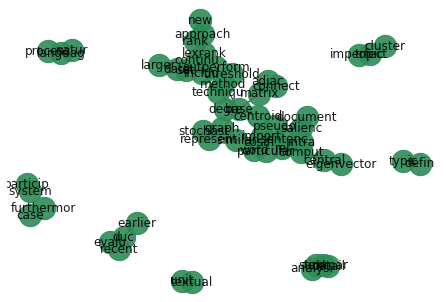

In [33]:
displayGraph(get_graph(text))

In [55]:
from keybert import KeyBERT

doc = """
         We introduce a new language representa-
tion model called BERT, which stands for
Bidirectional Encoder Representations from
Transformers. Unlike recent language repre-
sentation models (Peters et al., 2018a; Rad-
ford et al., 2018), BERT is designed to pre-
train deep bidirectional representations from
unlabeled text by jointly conditioning on both
left and right context in all layers. As a re-
sult, the pre-trained BERT model can be fine-
tuned with just one additional output layer
to create state-of-the-art models for a wide
range of tasks, such as question answering and
language inference, without substantial task-
specific architecture modifications.
BERT is conceptually simple and empirically
powerful. It obtains new state-of-the-art re-
sults on eleven natural language processing
tasks, including pushing the GLUE score to
80.5% (7.7% point absolute improvement),
MultiNLI accuracy to 86.7% (4.6% absolute
improvement), SQuAD v1.1 question answer-
ing Test F1 to 93.2 (1.5 point absolute im-
provement) and SQuAD v2.0 Test F1 to 83.1
(5.1 point absolute improvement).
      """
model = KeyBERT('distilbert-base-nli-mean-tokens')
keywords = model.extract_keywords(doc)

In [56]:
keywords

[('transformers', 0.438),
 ('new', 0.2569),
 ('f1', 0.2385),
 ('bert', 0.2368),
 ('glue', 0.2241)]